<h1 style='color:black' align='center'>Stock Price Prediction</h1>

<h2 style='color:blue'>Importing the Libraries</h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

<h2 style='color:blue'>Download Dataset</h2>

In [2]:
# !pip install quandl
# import quandl

start = '2013-01-01'
end = '2023-12-31'
stock = 'GOOG'

stock_data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


<h2 style='color:blue'>Load the Dataset</h2>

In [3]:
# data = quandl.get('NSE/TATAGLOBAL')
stock_data.reset_index(inplace=True)
stock_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,17.918339,18.107130,17.846855,18.013729,18.013729,102033017
1,2013-01-03,18.055573,18.229919,17.950716,18.024191,18.024191,93075567
2,2013-01-04,18.165413,18.467529,18.124067,18.380356,18.380356,110954331
3,2013-01-07,18.317591,18.415474,18.196297,18.300158,18.300158,66476239
4,2013-01-08,18.319834,18.338762,18.043119,18.264042,18.264042,67295297
...,...,...,...,...,...,...,...
2763,2023-12-22,142.130005,143.250000,142.054993,142.720001,142.720001,18494700
2764,2023-12-26,142.979996,143.945007,142.500000,142.820007,142.820007,11170100
2765,2023-12-27,142.830002,143.320007,141.050995,141.440002,141.440002,17288400
2766,2023-12-28,141.850006,142.270004,140.828003,141.279999,141.279999,12192500


In [4]:
ma_100_days = stock_data['Close'].rolling(100).mean()
ma_200_days = stock_data.Close.rolling(200).mean()

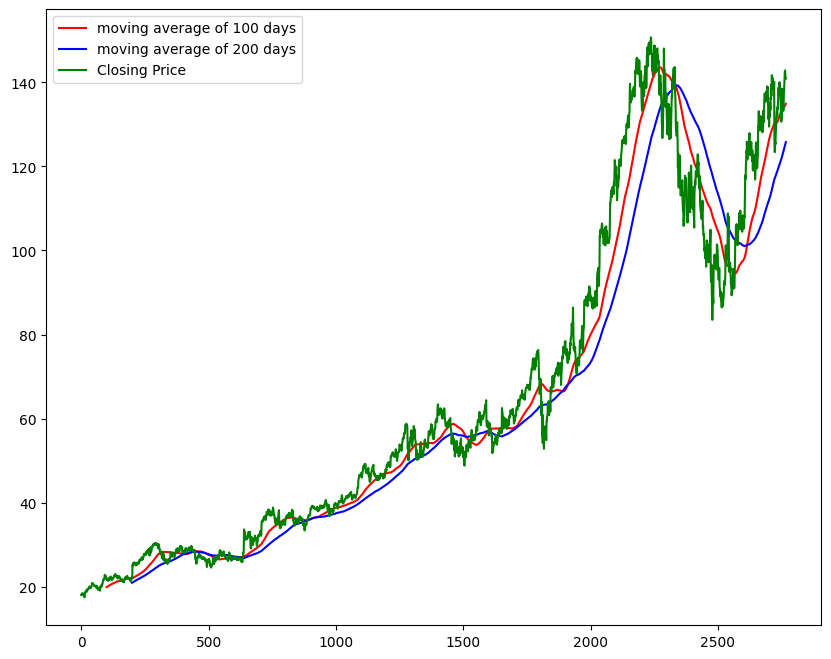

In [5]:
# Plotting Figure

plt.figure(figsize=(10, 8))
plt.plot(ma_100_days, 'r', label='moving average of 100 days')
plt.plot(ma_200_days, 'b', label='moving average of 200 days')
plt.plot(stock_data['Close'], 'g', label='Closing Price')
plt.legend(loc='upper left')

In [6]:
# delete all null values
stock_data.dropna(inplace=True)

<h2 style='color:blue'>Classification Problem: Buy or Sell the Stock</h2>

In [7]:
train_data = pd.DataFrame(stock_data.Close[:int(len(stock_data)*0.8)])
test_data = pd.DataFrame(stock_data.Close[int(len(stock_data)*0.8):])

In [10]:
train_data.shape[0]

2214

In [11]:
test_data.shape[0]

554

<h2 style='color:blue'>Min-Max Scaling</h2>

In [12]:
from sklearn.preprocessing import MinMaxScaler

mmc = MinMaxScaler(feature_range=(0, 1))
scale_train_data = mmc.fit_transform(train_data)

In [13]:
X, Y = [], []
for i in range(100, scale_train_data.shape[0]):
    X.append(scale_train_data[i-100:i])
    Y.append(scale_train_data[i, 0])

X, Y = np.array(X), np.array(Y)

In [ ]:
# Y = np.where(stock_data['Close'].shift(-1) > stock_data['Close'], 1, -1)

In [14]:
# Deep Learning Model
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [15]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True,
               input_shape=((X.shape[1], 1))))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=100, activation='relu', return_sequences=True))
model.add(Dropout(0.5))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.6))

model.add(Dense(units=1))

In [16]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, Y, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
67/67 [==============================] - 23s 253ms/step - loss: 0.0324
Epoch 2/10
67/67 [==============================] - 20s 302ms/step - loss: 0.0066
Epoch 3/10
67/67 [==============================] - 20s 301ms/step - loss: 0.0057
Epoch 4/10
67/67 [==============================] - 20s 297ms/step - loss: 0.0052
Epoch 5/10
67/67 [==============================] - 20s 299ms/step - loss: 0.0049
Epoch 6/10
67/67 [==============================] - 24s 355ms/step - loss: 0.0041
Epoch 7/10
67/67 [==============================] - 22s 331ms/step - loss: 0.0041
Epoch 8/10
67/67 [==============================] - 22s 335ms/step - loss: 0.0037
Epoch 9/10
67/67 [==============================] - 22s 322ms/step - loss: 0.0040
Epoch 10/10
67/67 [==============================] - 22s 321ms/step - loss: 0.0039


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 100, 100)          7

In [18]:
pas_100_days = train_data.tail(100)
test_data = pd.concat([pas_100_days, test_data], ignore_index=True)
# test_data.fillna(0, inplace=True)

In [20]:
scale_test_data = mmc.fit_transform(test_data)

In [21]:
X, Y = [], []
for i in range(100, scale_test_data.shape[0]):
    X.append(scale_test_data[i-100:i])
    Y.append(scale_test_data[i, 0])

X, Y = np.array(X), np.array(Y)

In [22]:
Y_pred = model.predict(X)
Y_pred

18/18 [==============================] - 2s 87ms/step


array([[0.7508584 ],
       [0.7476529 ],
       [0.74476516],
       [0.7422884 ],
       [0.7402935 ],
       [0.7388065 ],
       [0.73780924],
       [0.73725295],
       [0.7371012 ],
       [0.73733807],
       [0.7379742 ],
       [0.7390177 ],
       [0.7404716 ],
       [0.7423347 ],
       [0.7446078 ],
       [0.7472933 ],
       [0.7503922 ],
       [0.75389826],
       [0.75778234],
       [0.7619922 ],
       [0.76647043],
       [0.77115995],
       [0.7760048 ],
       [0.78095067],
       [0.7859526 ],
       [0.7909724 ],
       [0.7959629 ],
       [0.80086607],
       [0.8056171 ],
       [0.8101331 ],
       [0.814335  ],
       [0.8181415 ],
       [0.821471  ],
       [0.8242588 ],
       [0.8264593 ],
       [0.8280534 ],
       [0.8290669 ],
       [0.82956976],
       [0.8296603 ],
       [0.8294538 ],
       [0.8290604 ],
       [0.82856673],
       [0.8280428 ],
       [0.8275331 ],
       [0.82704943],
       [0.82657444],
       [0.8260797 ],
       [0.825

In [24]:
scale = 1/mmc.scale_
print(mmc.scale_, scale)

[0.01487675] [67.21900177]


In [25]:
Y_pred *= scale
Y *= scale

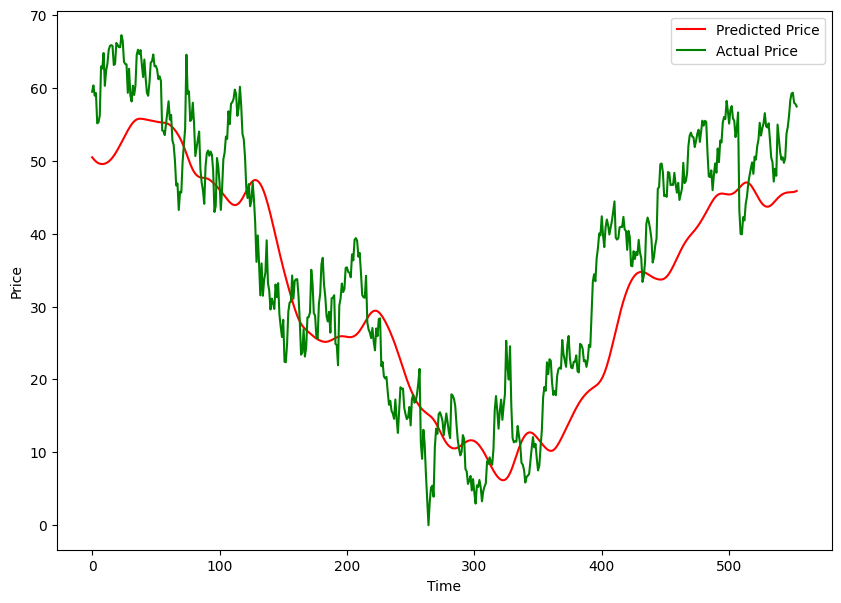

In [28]:
plt.figure(figsize=(10, 7))
plt.plot(Y_pred, 'r', label='Predicted Price')
plt.plot(Y, 'g', label='Actual Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [29]:
model.save('C:/Users/hp/Python_Projects/Resume_Projects/Stock Price Prediction Model.keras')

<h2 style='color:blue'>Train Test Split</h2>

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=50)

<h2 style='color:blue'>Implementation of KNN Classifier</h2>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
params = {'n_neighbors': [x for x in range(1, 16)]}
knn = KNeighborsClassifier()

# using gridsearchcv to find the best parameter
model = GridSearchCV(knn, params, cv=5)
model.fit(X_train, Y_train)

In [ ]:
# predict the model train data
Y_train_pred = model.predict(X_train)
Y_train_pred

In [ ]:
# predict the model test data
Y_test_pred = model.predict(X_test)
Y_test_pred

In [ ]:
# Accuracy Score
from sklearn.metrics import accuracy_score

train_score = accuracy_score(Y_train, Y_train_pred)
print("Accuracy of Train data: {:.2f}%".format(train_score*100))

In [ ]:
# Classification Report
from sklearn.metrics import classification_report

print(classification_report(Y_train, Y_train_pred))

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

cm_train = confusion_matrix(Y_train, Y_train_pred)
print(cm_train)

In [ ]:
def picture(cm):
    plt.figure(figsize=(10, 5))
    sns.heatmap(cm, annot=True)
    plt.xlabel('Predicted Data')
    plt.ylabel('Actual Data')

In [ ]:
# Picture of Confusion Matrix
picture(cm_train)

In [ ]:
test_score = accuracy_score(Y_test, Y_test_pred)
print('Accuracy of Train data: {:.2f}%'.format(test_score*100))

In [ ]:
print(classification_report(Y_test, Y_test_pred))

In [ ]:
cm_test = confusion_matrix(Y_train, Y_train_pred)
print(cm_test)

In [ ]:
picture(cm_test)

In [ ]:
actual_predicted_data = pd.DataFrame({'Actual Data': Y_test, 'Predicted Data': Y_test_pred})
actual_predicted_data.head(10)

In [ ]:
Y = data['Close']
Y

<h2 style='color:blue'>Train Test Split</h2>

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=50)

<h2 style='color:blue'>Implementation of KNN Regression</h2>

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {'n_neighbors': [x for x in range(1, 16)]}
knn_reg = KNeighborsRegressor()

# using gridsearchcv to find the best parameter
reg_model = GridSearchCV(knn_reg, params, cv=5)
reg_model.fit(X_train, Y_train)

In [ ]:
# predict the model train data
Y_train_pred = reg_model.predict(X_train)
Y_train_pred

In [ ]:
# predict the model train data
Y_test_pred = reg_model.predict(X_test)
Y_test_pred

In [ ]:
actual_predicted_data = pd.DataFrame({'Actual Close Data': Y_test, 'Predicted Close Data': Y_test_pred})
actual_predicted_data.head(10)